# Phase Spaces

explore behavior phase spaces

In [1]:
# this file's version
from datetime import datetime as dt
print("Notebook version as of", dt.today().date())

Notebook version as of 2018-11-23


## Imports

In [2]:
cd ../aei

/home/wbarfuss/Drive/3.2_Beruf/1_Projects/01_DetRL/DetRL_Code/public/aei


In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

In [4]:
cd agents/

/home/wbarfuss/Drive/3.2_Beruf/1_Projects/01_DetRL/DetRL_Code/public/aei/agents


In [5]:
from detQ import detQ
from detAC import detAC
from detSARSA import detSARSA

from jacobiQ import JacobiQ
from jacobiAC import JacobiAC
from jacobiSARSA import JacobiSARSA

In [6]:
cd ../envs/

/home/wbarfuss/Drive/3.2_Beruf/1_Projects/01_DetRL/DetRL_Code/public/aei/envs


In [7]:
from Env_2StateMatchingPennies import TwoStateMatchingPennies

## Parameters

In [8]:
cd ../../

/home/wbarfuss/Drive/3.2_Beruf/1_Projects/01_DetRL/DetRL_Code/public


In [9]:
Rmp = TwoStateMatchingPennies().RewardTensor()
Tmp = TwoStateMatchingPennies().TransitionTensor()

In [10]:
def obt_behavior(X000, X100, X010, X110):
    Xinit = np.zeros((2,2,2))
    Xinit[0, 0, 0] = X000
    Xinit[1, 0, 0] = X100
    Xinit[0, 1, 0] = X010
    Xinit[1, 1, 0] = X110

    Xinit[0, 0, 1] = 1.0 - Xinit[0, 0, 0]
    Xinit[1, 0, 1] = 1.0 - Xinit[1, 0, 0]
    Xinit[0, 1, 1] = 1.0 - Xinit[0, 1, 0]
    Xinit[1, 1, 1] = 1.0 - Xinit[1, 1, 0]
    
    return Xinit

## Phase Space

In [11]:
cd aei/utils/

/home/wbarfuss/Drive/3.2_Beruf/1_Projects/01_DetRL/DetRL_Code/public/aei/utils


In [12]:
run QuiverPlot.py

In [13]:
alpha = 0.01
beta = 100.0
gamma = 0.9

In [14]:
agents = detAC(Tmp, Rmp, alpha, beta, gamma)
X1 = obt_behavior(X000=0.01, X100=0.99, X010=0.99, X110=0.01)
X2 = obt_behavior(X000=0.75, X100=0.5, X010=0.25, X110=0.5)


<IPython.core.display.Javascript object>


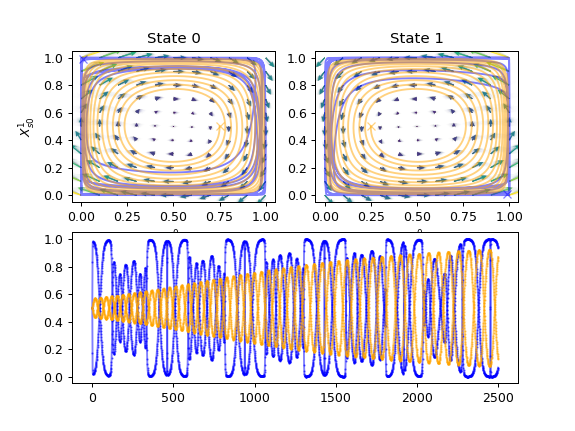

In [15]:
fig = plt.figure()
ax1, ax2 = plt.subplot(221), plt.subplot(222)
axT = plt.subplot(212)

axes = plot_quiver(agents, axes=[ax1, ax2])

Tmax = 2500

rt1, fpr1 = plot_trajectory(agents, X1, axes=[ax1, ax2],Tmax=Tmax, color="blue", alpha=0.5)
axT.plot(rt1, ".-", markersize=1.5, alpha=0.5, color="blue")

rt2, fpr2 = plot_trajectory(agents, X2, axes=[ax1, ax2],Tmax=Tmax, color="orange", alpha=0.5)
axT.plot(rt2, ".-", markersize=1.5, alpha=0.5, color="orange")



